In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn

#Data loading and preprocessing

In [63]:
df=pd.read_csv("water_potability.csv")
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [64]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [65]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [67]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

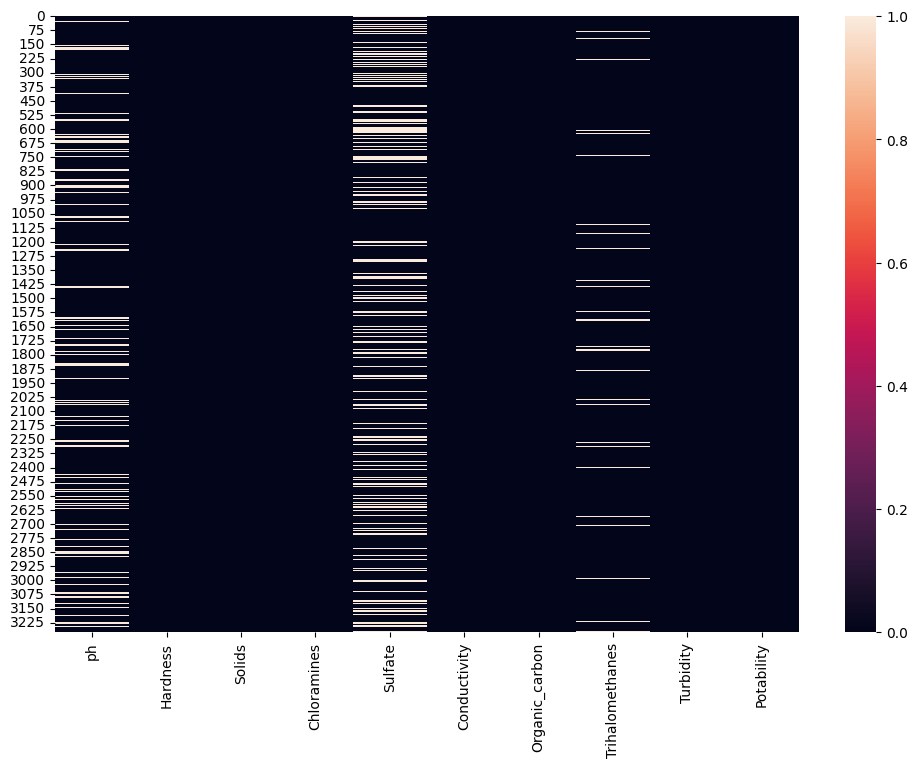

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

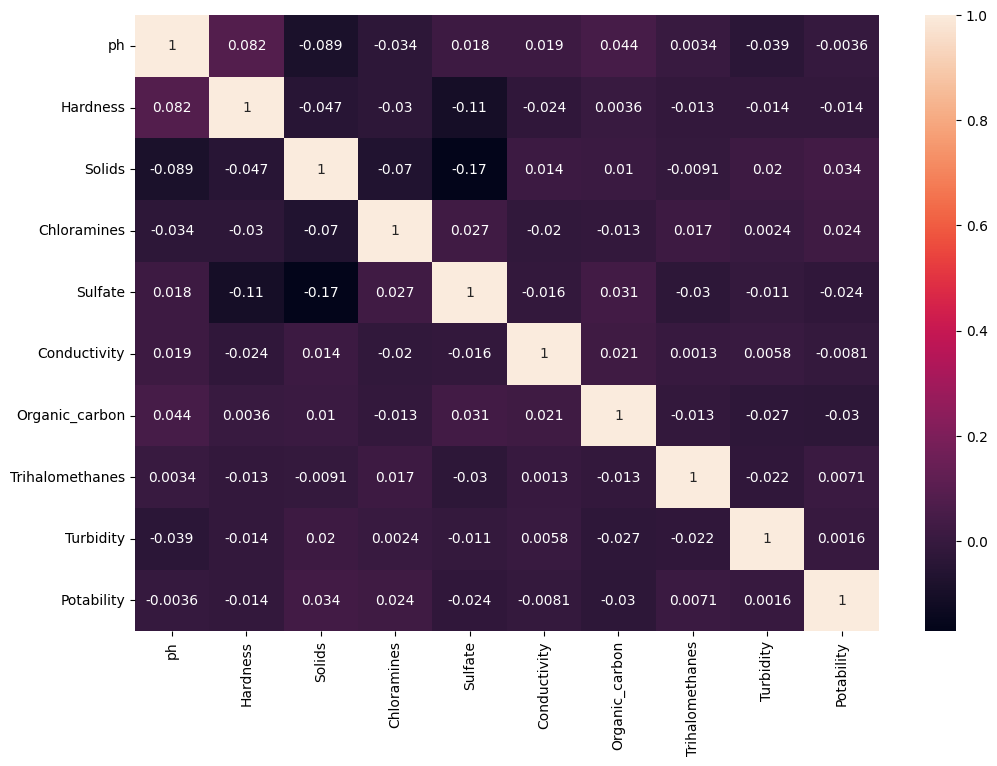

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

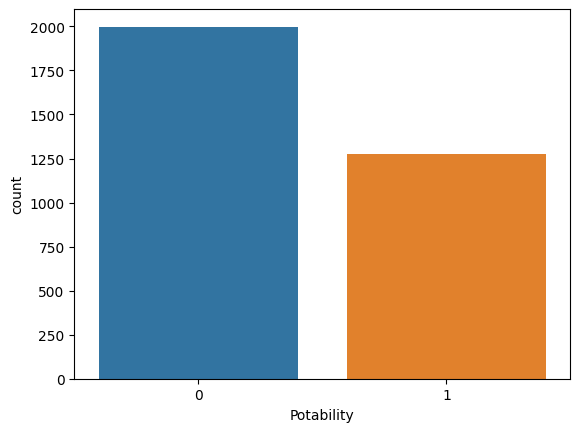

In [70]:
sns.countplot(x="Potability",data=df)

In [71]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

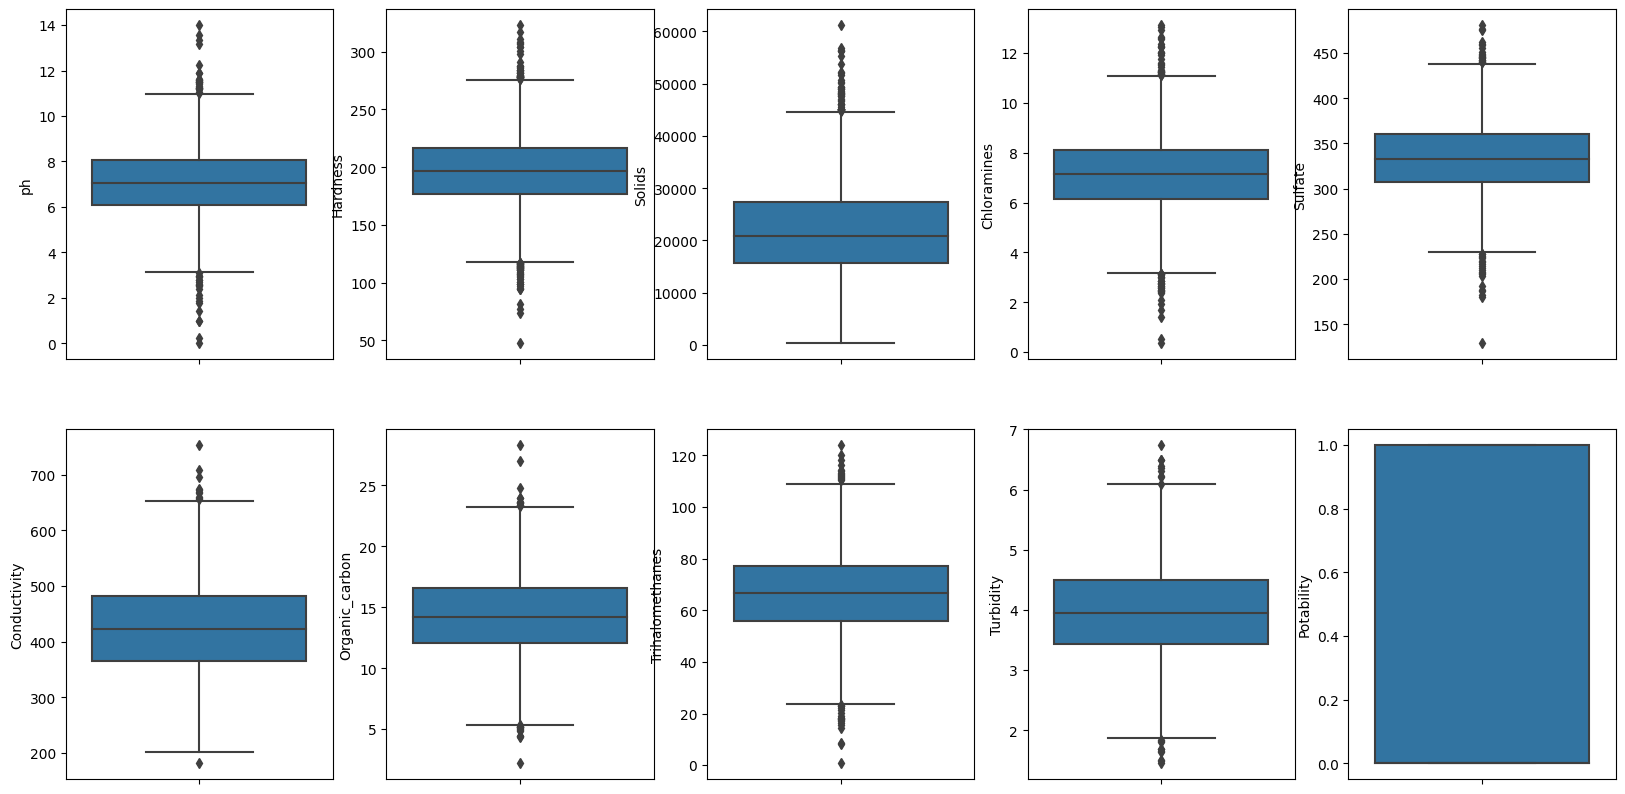

In [72]:
# Visualization dataset also checking for outliers

fig, ax = plt.subplots(ncols=5,nrows=2,figsize=(20,10))
ax=ax.flatten()
index = 0

for col,values in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])

  index +=1

In [73]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [74]:
fig=px.pie(df,names="Potability",hole=0.4,template='plotly_dark')
fig.show()

In [75]:
fig=px.scatter(df,x="ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [76]:
fig=px.scatter(df,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

Text(0, 0.5, 'Percentage of missing values')

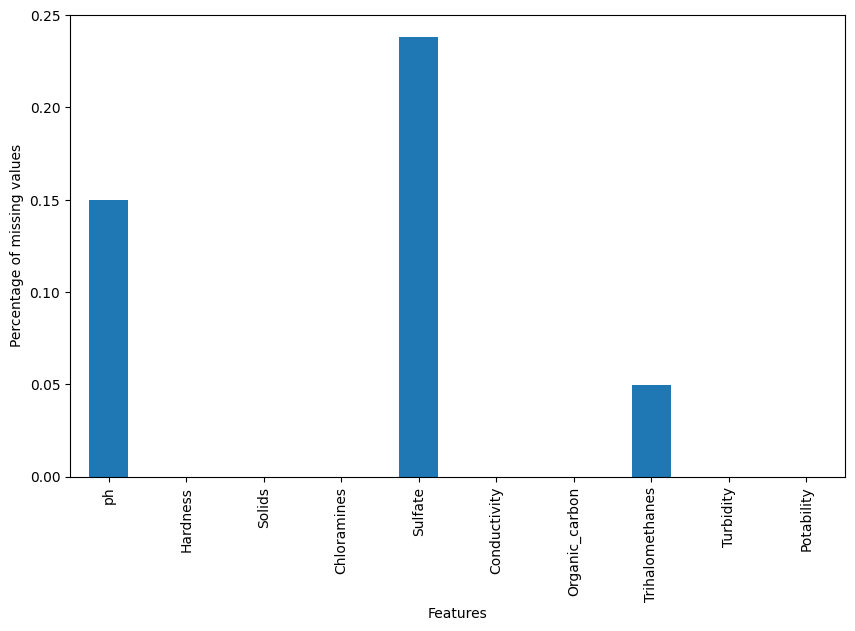

In [77]:
#Eliminating null values
df.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [78]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [79]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

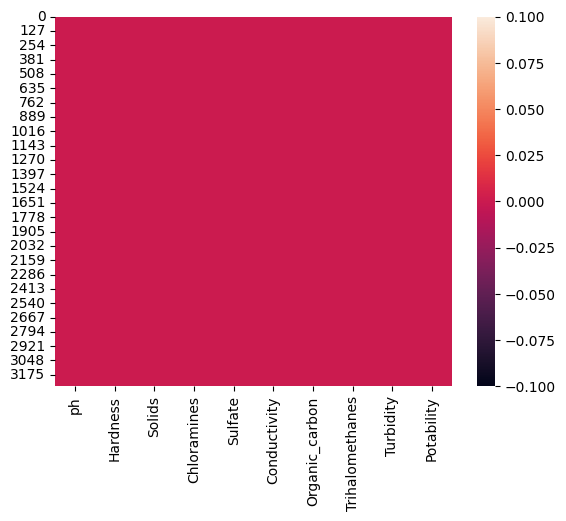

In [80]:
sns.heatmap(df.isnull())

In [81]:
#train data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [82]:
X=df.drop(labels=['Potability'],axis=1)
y=df['Potability']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape ,X_test.shape

((2620, 9), (656, 9))

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [86]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [87]:
num=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [88]:
num_pipe = Pipeline(steps = [("im" , SimpleImputer(strategy="median")),("scalar",StandardScaler())])

In [89]:
preprocessor = ColumnTransformer(transformers=[("num_pip",num_pipe,num)])

In [90]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [92]:
log=LogisticRegression()
sv=SVR()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [93]:
algo = [log,sv,dtc,rf]
names = ['LogisticRegression','SVR','DecisionTreeRegressor','RandomForestClassifier']

In [94]:
for i,j in zip(algo,names):
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  y_pred = sklearn.preprocessing.binarize(y_pred.reshape(-1, 1))
  print(j)
  print("Accuracy is", accuracy_score(y_test, y_pred) * 100)
  print("MAE is", mean_absolute_error(y_test, y_pred) * 100)
  print('+' * 20)

LogisticRegression
Accuracy is 62.80487804878049
MAE is 37.19512195121951
++++++++++++++++++++
SVR
Accuracy is 43.75
MAE is 56.25
++++++++++++++++++++
DecisionTreeRegressor
Accuracy is 58.536585365853654
MAE is 41.46341463414634
++++++++++++++++++++
RandomForestClassifier
Accuracy is 68.4451219512195
MAE is 31.554878048780488
++++++++++++++++++++
